In [78]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-38.16311956825829, 87.97733017116957),
 (63.7200427225016, -95.44447553521297),
 (35.99878907088106, -75.91323675322919),
 (77.29556941226949, 103.66328013131812),
 (41.67267060032637, 1.4055231193770226),
 (-12.194476555523039, 97.31376794058559),
 (-21.115412089997463, 151.78224032120858),
 (-36.67288530497389, 127.72378440911757),
 (-12.567686983566247, 65.08600501139077),
 (-41.95736579888749, -87.95687965310135),
 (65.37563050804755, -79.93892787928132),
 (-0.6957764645942319, -3.170844393112617),
 (-70.638027148421, -36.66830787411914),
 (-33.23073196083903, 101.31399771721544),
 (-9.956086574841592, -65.28371480596505),
 (-18.70887515154655, 136.30678943189469),
 (-48.96172574444153, 37.871695006952734),
 (-33.980321804873874, 177.08281079535737),
 (61.01755559596316, -74.98954601294368),
 (-16.079195870937212, 13.265901126792869),
 (-21.262043507424522, -137.07791640033903),
 (62.12882875018937, 152.50345057714225),
 (34.8331063703468, 65.3359669277014),
 (35.799701259403676

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key 

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8110db33ab35113a5d935e2df37f042e


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | elizabeth city
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | igualada
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | yeppoon
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | grand gaube
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | axim
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | guajara-mirim
Processing Record 16 of Set 1 | mount isa
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | ngunguru
Processing Record 19 of Set 1 | lubango
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | seymchan
Processing Record 22 of Set 1 | ciras
Processing Record 23 of Set 1 | miyazu
Pr

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | elizabeth city
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | igualada
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | yeppoon
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | grand gaube
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | axim
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | guajara-mirim
City not found. Skipping...
Processing Record 16 of Set 1 | mount isa
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | ngunguru
Processing Record 19 of Set 1 | lubango
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | seymchan
Processing Record 22 of Set 1 | ciras
City not foun

Processing Record 36 of Set 4 | poim
Processing Record 37 of Set 4 | vostok
Processing Record 38 of Set 4 | weihe
Processing Record 39 of Set 4 | sao joao da barra
Processing Record 40 of Set 4 | isabela
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | san jose
Processing Record 43 of Set 4 | santa fe
Processing Record 44 of Set 4 | ust-kuyga
Processing Record 45 of Set 4 | kizukuri
Processing Record 46 of Set 4 | trincomalee
Processing Record 47 of Set 4 | katyuzhanka
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | lubao
Processing Record 50 of Set 4 | vila velha
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | cisaat
Processing Record 4 of Set 5 | hluti
Processing Record 5 of Set 5 | oriximina
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | chern
Processing Record 8 of Set 5 | jatiroto
Processing Record 9 of Set 5 | ibra
Processing Rec

Processing Record 25 of Set 8 | bawku
Processing Record 26 of Set 8 | saint-joseph
Processing Record 27 of Set 8 | kijang
Processing Record 28 of Set 8 | pasinler
Processing Record 29 of Set 8 | laguna
Processing Record 30 of Set 8 | raudeberg
Processing Record 31 of Set 8 | palana
Processing Record 32 of Set 8 | impfondo
Processing Record 33 of Set 8 | tambul
City not found. Skipping...
Processing Record 34 of Set 8 | boddam
Processing Record 35 of Set 8 | hamilton
Processing Record 36 of Set 8 | bouafle
Processing Record 37 of Set 8 | knysna
Processing Record 38 of Set 8 | wajima
Processing Record 39 of Set 8 | bilibino
Processing Record 40 of Set 8 | murgab
Processing Record 41 of Set 8 | suez
Processing Record 42 of Set 8 | tondano
Processing Record 43 of Set 8 | poltavka
Processing Record 44 of Set 8 | marsh harbour
Processing Record 45 of Set 8 | allen
Processing Record 46 of Set 8 | medina del campo
Processing Record 47 of Set 8 | brownsville
Processing Record 48 of Set 8 | gedo

Processing Record 16 of Set 12 | takoradi
Processing Record 17 of Set 12 | gurskoye
City not found. Skipping...
Processing Record 18 of Set 12 | mergui
City not found. Skipping...
Processing Record 19 of Set 12 | mentakab
Processing Record 20 of Set 12 | dunn
Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | rio gallegos
Processing Record 23 of Set 12 | svetlyy
Processing Record 24 of Set 12 | timra
Processing Record 25 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 12 | klaeng
Processing Record 27 of Set 12 | comodoro rivadavia
Processing Record 28 of Set 12 | sioux lookout
Processing Record 29 of Set 12 | ahipara
Processing Record 30 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 31 of Set 12 | bafoulabe
Processing Record 32 of Set 12 | saleaula
City not found. Skipping...
Processing Record 33 of Set 12 | talara
Processing Record 34 of Set 12 | urumqi
Processing Record 35 of Set 12 | cairns
Processing Record 36 

In [10]:
len(cities)


625

In [11]:
city_data_df = city_data
city_data_df

[{'City': 'Busselton',
  'Lat': -33.65,
  'Lng': 115.33,
  'Max Temp': 46,
  'Humidity': 73,
  'Cloudiness': 21,
  'Wind Speed': 13.44,
  'Country': 'AU',
  'Date': '2020-08-28 20:58:24'},
 {'City': 'Thompson',
  'Lat': 55.74,
  'Lng': -97.86,
  'Max Temp': 60.8,
  'Humidity': 77,
  'Cloudiness': 75,
  'Wind Speed': 3.36,
  'Country': 'CA',
  'Date': '2020-08-28 20:58:24'},
 {'City': 'Elizabeth City',
  'Lat': 36.29,
  'Lng': -76.25,
  'Max Temp': 96.01,
  'Humidity': 56,
  'Cloudiness': 1,
  'Wind Speed': 10.29,
  'Country': 'US',
  'Date': '2020-08-28 20:58:24'},
 {'City': 'Khatanga',
  'Lat': 71.97,
  'Lng': 102.5,
  'Max Temp': 52.43,
  'Humidity': 57,
  'Cloudiness': 2,
  'Wind Speed': 5.53,
  'Country': 'RU',
  'Date': '2020-08-28 20:58:24'},
 {'City': 'Igualada',
  'Lat': 41.58,
  'Lng': 1.62,
  'Max Temp': 72,
  'Humidity': 83,
  'Cloudiness': 97,
  'Wind Speed': 5.99,
  'Country': 'ES',
  'Date': '2020-08-28 20:58:25'},
 {'City': 'Bengkulu',
  'Lat': -3.8,
  'Lng': 102.27,
  '

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,46.00,73,21,13.44,AU,2020-08-28 20:58:24
1,Thompson,55.74,-97.86,60.80,77,75,3.36,CA,2020-08-28 20:58:24
2,Elizabeth City,36.29,-76.25,96.01,56,1,10.29,US,2020-08-28 20:58:24
3,Khatanga,71.97,102.50,52.43,57,2,5.53,RU,2020-08-28 20:58:24
4,Igualada,41.58,1.62,72.00,83,97,5.99,ES,2020-08-28 20:58:25
5,Bengkulu,-3.80,102.27,75.51,85,99,6.06,ID,2020-08-28 20:53:47
6,Yeppoon,-23.13,150.73,57.20,71,0,4.70,AU,2020-08-28 20:54:23
7,Esperance,-33.87,121.90,55.40,71,44,24.16,AU,2020-08-28 20:58:25
8,Grand Gaube,-20.01,57.66,68.00,78,1,5.01,MU,2020-08-28 20:55:04
9,Ancud,-41.87,-73.82,46.99,75,75,17.22,CL,2020-08-28 20:54:21


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [14]:
column_df = city_data_df[new_column_order]
column_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-08-28 20:58:24,-33.65,115.33,46.00,73,21,13.44
1,Thompson,CA,2020-08-28 20:58:24,55.74,-97.86,60.80,77,75,3.36
2,Elizabeth City,US,2020-08-28 20:58:24,36.29,-76.25,96.01,56,1,10.29
3,Khatanga,RU,2020-08-28 20:58:24,71.97,102.50,52.43,57,2,5.53
4,Igualada,ES,2020-08-28 20:58:25,41.58,1.62,72.00,83,97,5.99
...,...,...,...,...,...,...,...,...,...
569,Borujerd,IR,2020-08-28 20:57:11,33.90,48.75,69.80,16,0,9.17
570,Wufeng,CN,2020-08-28 21:01:28,27.45,104.83,58.50,93,54,4.38
571,Camana,PE,2020-08-28 21:00:12,-16.62,-72.71,62.49,77,69,8.32
572,Sembe,CG,2020-08-28 21:01:29,1.65,14.58,71.78,91,99,1.81


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
city_data_df = pd.read_csv("weather_data\cities.csv")
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Busselton,-33.65,115.33,46.00,73,21,13.44,AU,2020-08-28 20:58:24
1,1,Thompson,55.74,-97.86,60.80,77,75,3.36,CA,2020-08-28 20:58:24
2,2,Elizabeth City,36.29,-76.25,96.01,56,1,10.29,US,2020-08-28 20:58:24
3,3,Khatanga,71.97,102.50,52.43,57,2,5.53,RU,2020-08-28 20:58:24
4,4,Igualada,41.58,1.62,72.00,83,97,5.99,ES,2020-08-28 20:58:25
...,...,...,...,...,...,...,...,...,...,...
569,569,Borujerd,33.90,48.75,69.80,16,0,9.17,IR,2020-08-28 20:57:11
570,570,Wufeng,27.45,104.83,58.50,93,54,4.38,CN,2020-08-28 21:01:28
571,571,Camana,-16.62,-72.71,62.49,77,69,8.32,PE,2020-08-28 21:00:12
572,572,Sembe,1.65,14.58,71.78,91,99,1.81,CG,2020-08-28 21:01:29


In [18]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                    Geraldton
Lat                        -28.77
Lng                         114.6
Max Temp                     55.4
Humidity                       71
Cloudiness                     26
Wind Speed                  10.29
Country                        AU
Date          2020-08-28 20:58:27
Name: 13, dtype: object

In [19]:
#Northern Hemisphere latitiudes
city_data_df["Lat"] >= 0


0      False
1       True
2       True
3       True
4       True
       ...  
569     True
570     True
571    False
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [61]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head(5)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Busselton,-33.65,115.33,46.00,73,21,13.44,AU,2020-08-28 20:58:24
1,1,Thompson,55.74,-97.86,60.80,77,75,3.36,CA,2020-08-28 20:58:24
2,2,Elizabeth City,36.29,-76.25,96.01,56,1,10.29,US,2020-08-28 20:58:24
3,3,Khatanga,71.97,102.50,52.43,57,2,5.53,RU,2020-08-28 20:58:24
4,4,Igualada,41.58,1.62,72.00,83,97,5.99,ES,2020-08-28 20:58:25


In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

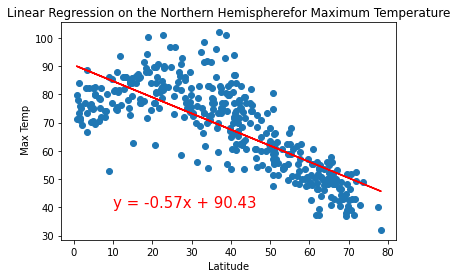

In [94]:
# Linear regression on the Northern Hemisphere
plt.title(f"Linear Regression on the Northern Hemispherefor Maximum Temperature")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", " Max Temp", (10,40))

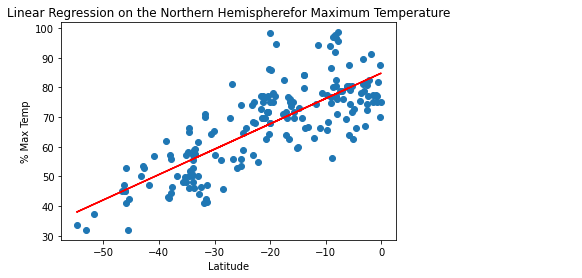

In [95]:
# Linear regression on the Northern Hemisphere
plt.title(f"Linear Regression on the Northern Hemispherefor Maximum Temperature")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', '% Max Temp',(10,40))

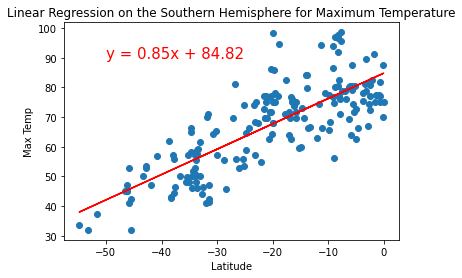

In [96]:
# Linear regression on the Southern Hemisphere
plt.title(f"Linear Regression on the Southern Hemisphere for Maximum Temperature")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

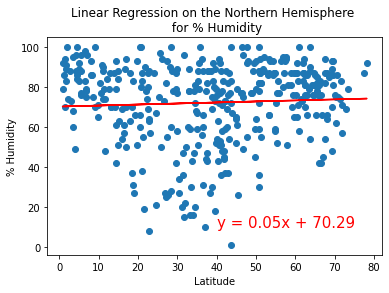

In [97]:
# Linear regression on the Northern Hemisphere
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

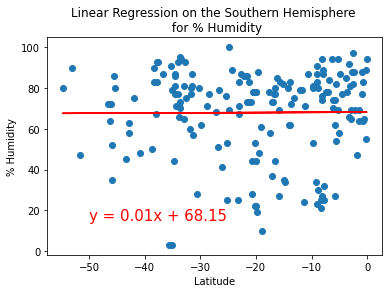

In [99]:
# Linear regression on the Southern Hemisphere
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

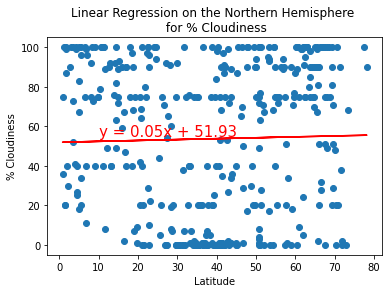

In [100]:
# Linear regression on the Northern Hemisphere
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

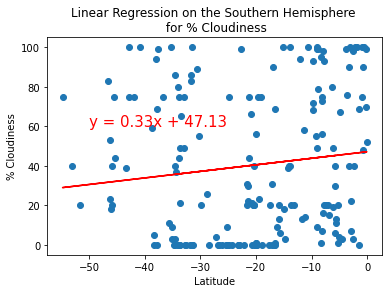

In [108]:
# Linear regression on the Southern Hemisphere
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

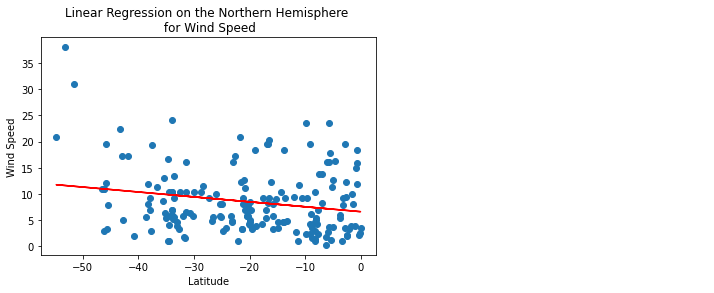

In [119]:
# Linear regression on the Northern Hemisphere
plt.title(f"Linear Regression on the Northern Hemisphere \n for Wind Speed")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

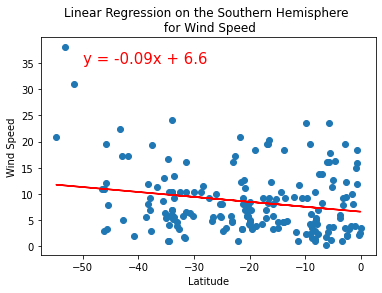

In [120]:
# Linear regression on the Southern Hemisphere
plt.title(f"Linear Regression on the Southern Hemisphere \n for Wind Speed")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))